https://www.kaggle.com/alokevil/simple-eda-for-beginners

# Census Income Data Set

# Introduction
A census is the procedure of systematically acquiring and recording information about the members of a given population. The census is a special, wide-range activity, which takes place once a decade in the entire country. The purpose is to gather information about the general population, in order to present a full and reliable picture of the population in the country - its housing conditions and demographic, social and economic characteristics. The information collected includes data on age, gender, country of origin, marital status, housing conditions, marriage, education, employment, etc.

### Data description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). The prediction task is to determine whether a person makes over $50K a year.

### Categorical Attributes

- *workclass*: Individual work category
>**levels**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- *education*: Individual's highest education degree
>**levels**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- *marital-status*: Individual marital status
>**levels**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- *occupation*: Individual's occupation
>**levels**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- *relationship*: Individual's relation in a family
>**levels**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- *race*: Race of Individual
>**levels**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- *sex*: Individual's sex
>**levels**: Female, Male.
- *native-country*: Individual's native country
>**levels**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
<br>
<br>


### Continuous Attributes

- *age*: Age of an individual

- *fnlwgt*: final weight 

- *capital-gain* 

- *capital-loss* 

- *hours-per-week*: Individual's working hour per week

# Setup

### Load Libraries

In [368]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing, tree, model_selection, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score
import xgboost
from mlxtend.classifier import StackingClassifier
from yellowbrick.classifier import ConfusionMatrix, ROCAUC
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import StratifiedKFold
import missingno as msno
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

### Path Manager

In [369]:
# Make project folder working directory.
%cd "C:\Users\STPI0560\Desktop\Python Projects\Adult Income"

C:\Users\STPI0560\Desktop\Python Projects\Adult Income


### Load Functions

In [370]:
# %load "bin\getDuplicateColumns.py"
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [371]:
# %load "bin\plotPredictors.py"
def plotPredictors(data, predictor, width, height):
    '''
    Return a plot with frequency of categorical variables for an inputed predictor.
    data: Input dataframe in pandas format.
    predictor: Name of predictor column, in quotes ("").
    width: Width of plot.
    height: Height of plot.
    '''
    # Set plot size.
    plt.figure(figsize=(width,height))
    plt.title(predictor)
    ax = sns.countplot(x=predictor, data=data)
    for p in ax.patches:
        height = p.get_height()
        return plt.show()

### Load Data

In [372]:
# Read data.
df = pd.read_csv('data\Adult.csv')

### Quick Look

In [373]:
# Glimps dataframe.
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [374]:
# Check shape of data.
df.shape

(48842, 15)

In [375]:
# Check data type of each column.
print('Data type of each column of Dataframe :')
df.dtypes

Data type of each column of Dataframe :


age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [376]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [377]:
df = df.rename(columns={'educational-num': 'educational_num', 'marital-status': 'marital_status', 'capital-gain': 'capital_gain', 'capital-loss': 'capital_loss', 'hours-per-week': 'hours_per_week', 'native-country': 'native_country'})

# Missing Data

### Print A List

In [378]:
# Print a list of each column that has at least 1 missing value.
print('List of columns with missing values:', [col for col in df.columns if df[col].isnull().any()], '\n')
print('Number of missing values per column:')
df.isnull().mean() * 100

List of columns with missing values: [] 

Number of missing values per column:


age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational_num    0.0
marital_status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital_gain       0.0
capital_loss       0.0
hours_per_week     0.0
native_country     0.0
income             0.0
dtype: float64

### Plot Percentage Missing

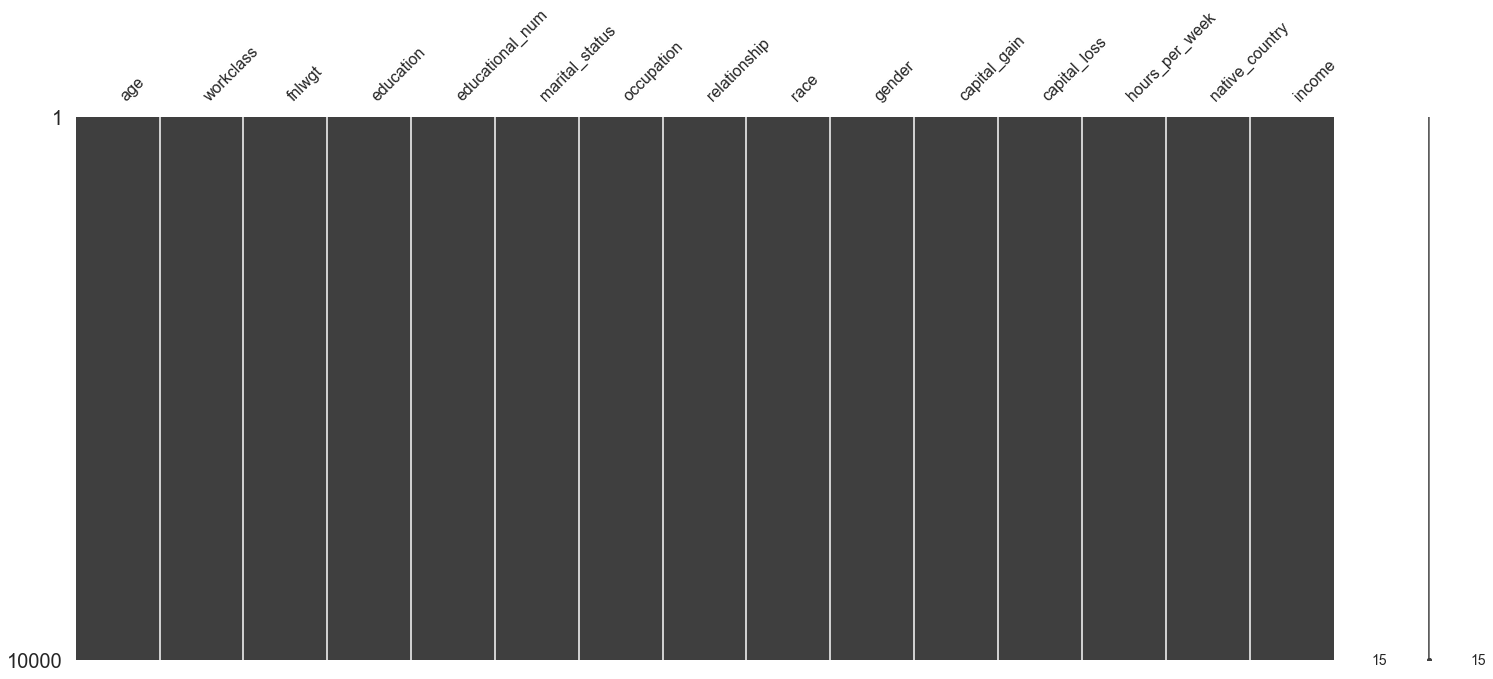

In [379]:
# Amount of missing data. White spots indicate missing values. If missing data were not random, the line
# on the side would show a pattern.
ax = msno.matrix(df.sample(10000))
ax.get_figure().savefig("results\missingdata1.png")

### Plot Percentage Not Missing

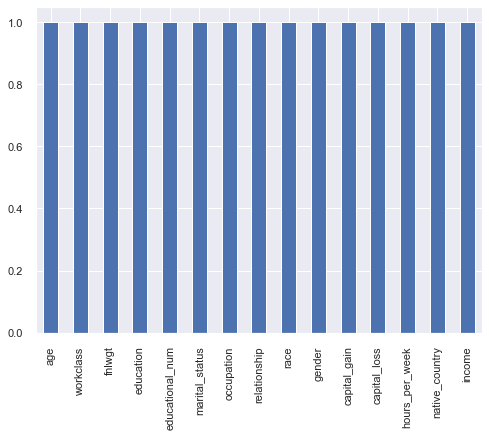

In [380]:
#Percentage of non-missing data
fig, ax = plt.subplots(figsize=(8, 6))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)
fig.savefig("results/missingdata2.png", dpi=300)

Conclusion: No missing data.

# Assess variables
Below I'm going to simultaniously plot the data and clean it if necessary. I'll do this in sections for each predictor. Categorical variable will go first, followed by continuous variables.

### Workclass

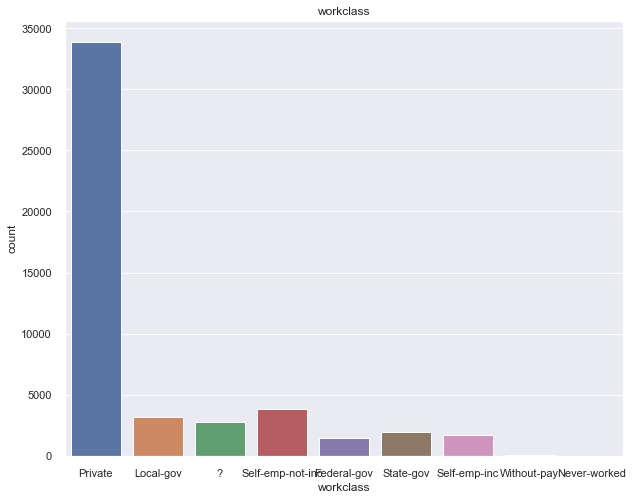

In [381]:
plotPredictors(df, "workclass", 10, 8)

Conclusion:Some data are labelled "?". Many options on how to deal with this. We could remove all observations, or code a new column that is 1 when that observation was missing data, and 0 otherwise. What percentage of the dataset contains people whose workclass is "Private"?

In [382]:
df['workclass'].value_counts(normalize=True) * 100

Private             69.419762
Self-emp-not-inc     7.907129
Local-gov            6.420703
?                    5.730724
State-gov            4.055935
Self-emp-inc         3.470374
Federal-gov          2.931903
Without-pay          0.042996
Never-worked         0.020474
Name: workclass, dtype: float64

69% of workclass are private, and only 5% are ?. Therefore, I'm going to change all instances of ? to "Private".

In [383]:
df['workclass'] = df['workclass'].str.replace("?","Private")

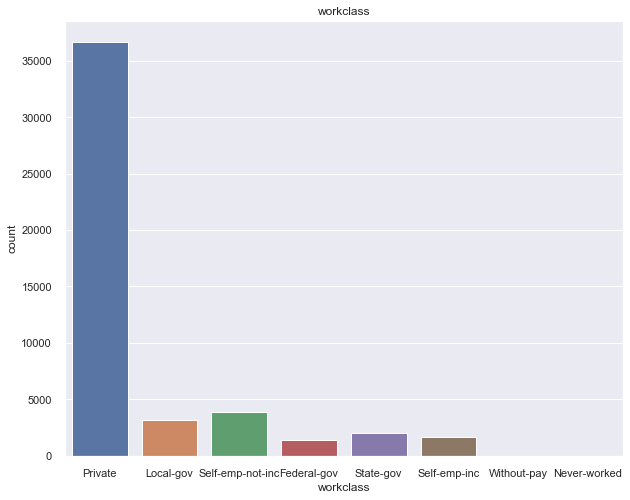

In [384]:
plotPredictors(df, "workclass", 10, 8)

### Education

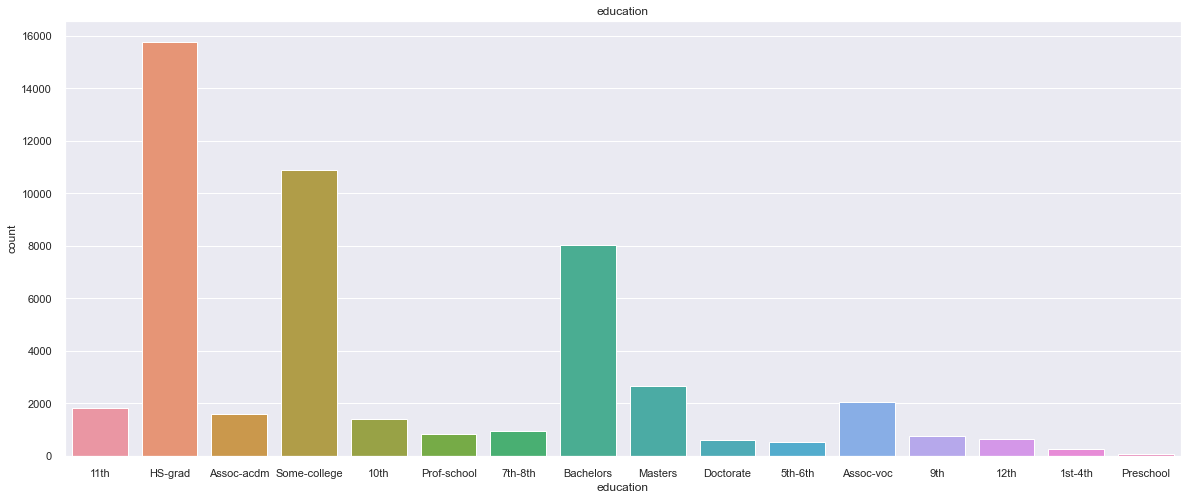

In [385]:
plotPredictors(df, "education", 20, 8)

Conclusion: Some data from individuals in preschool and grade school. Might not be useful since anyone in elementary school or below won't make money, so we can always predict that they make less than 50,000 a year. However, these values may also help the model find patterns in those making less than 50,000 per year. Thus, we will keep them in.

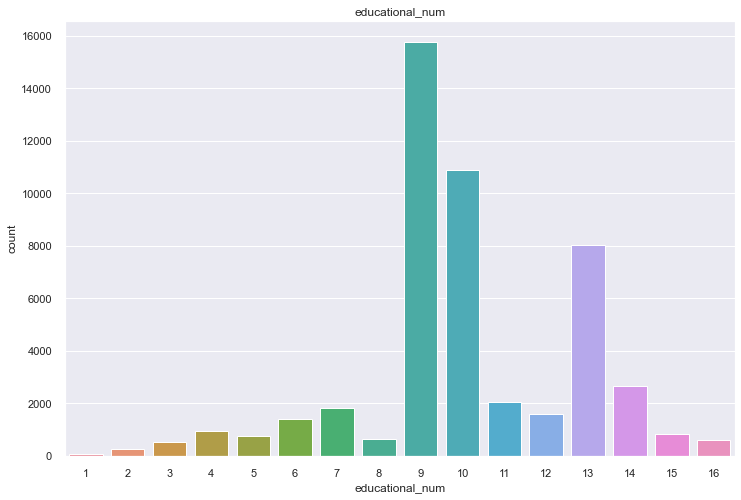

In [386]:
plotPredictors(df, "educational_num", 12, 8)

Conclusion: This variable looks like a categorical version of "education". Redundent, so can probably be removed.

In [387]:
df = df.drop(columns=['educational_num'])

### Marriage-status

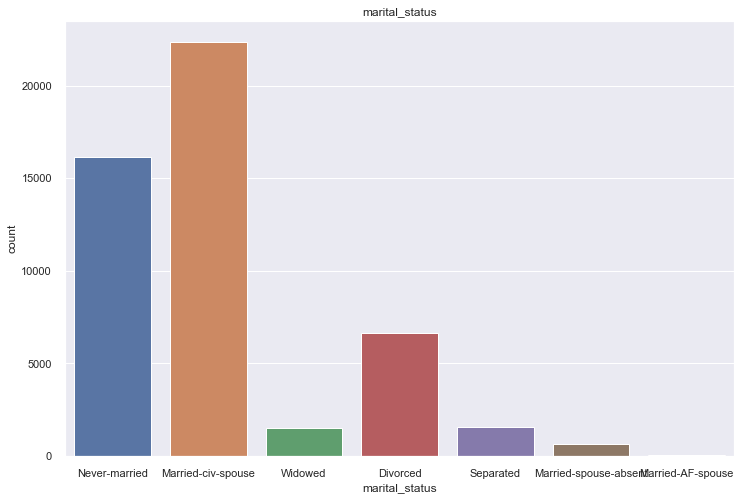

In [388]:
plotPredictors(df, "marital_status", 12, 8)

Conclusion: No obvious issues.

### Occupation

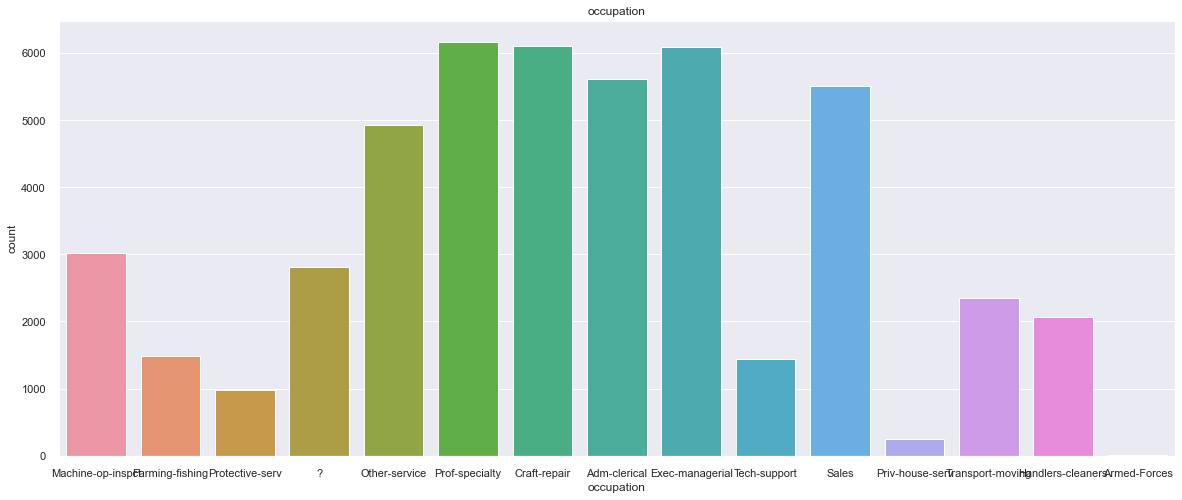

In [389]:
plotPredictors(df, "occupation", 20, 8)

Conclusion:Some data are labelled "?". Let's replace it "Prof-Speciality"

In [390]:
df['occupation'] = df['occupation'].str.replace("?","Prof-speciality")

### Relationship

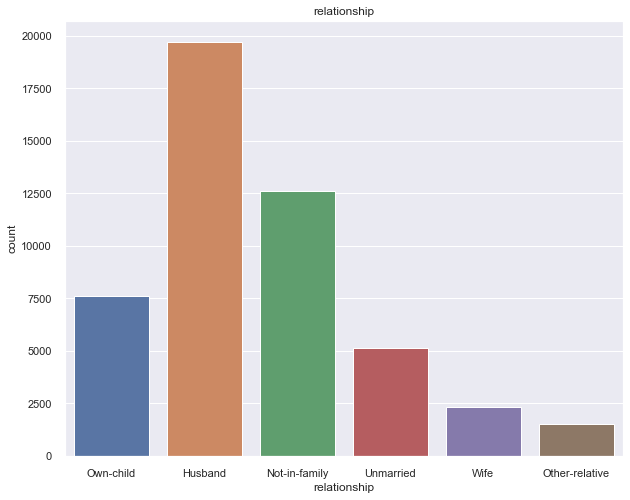

In [391]:
plotPredictors(df, "relationship", 10, 8)

Conclusion: No obvious issues.

### Race

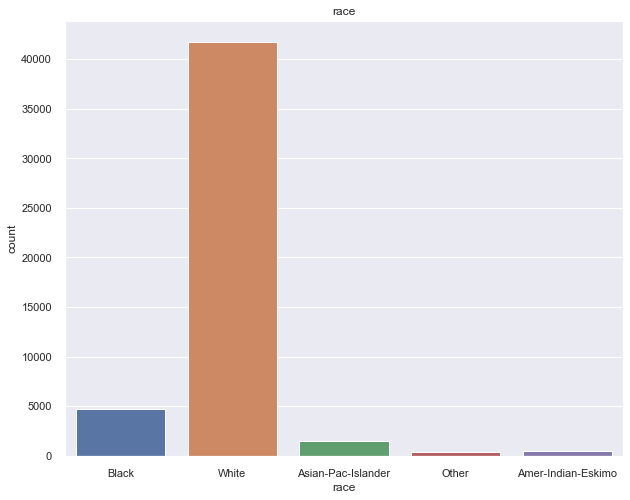

In [392]:
plotPredictors(df, "race", 10, 8)

Conclusion: No obvious issues.

### Gender

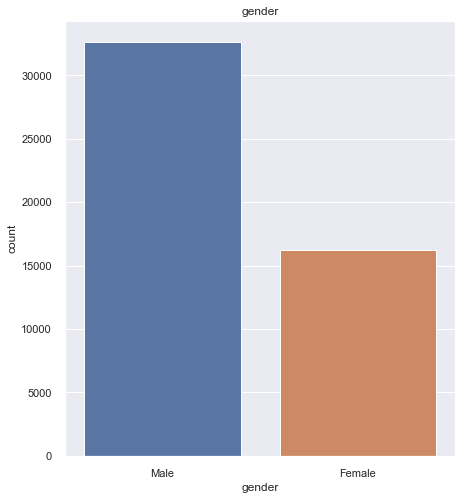

In [393]:
plotPredictors(df, "gender", 7, 8)

Conclusion: Dataset skewed towards males. But, this isn't an issue for the model.

In [394]:
df

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,Never-married,Prof-speciality,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Capital-Gain/Capital-loss

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='capital_gain', ylabel='capital_loss'>

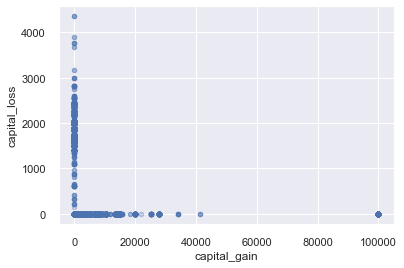

In [395]:
fig, ax = plt.subplots(figsize=(6, 4))
df.plot.scatter(x="capital_gain", y="capital_loss", ax=ax, alpha=0.3)

Conclusion: When peoplehave zero capital gain, they have large capital-loss, and vis-versa. Perhaps these can be combined into a "capital-change" difference score variable.

In [396]:
df["capital_diff"] = df["capital_gain"] - df["capital_loss"]
df = df.drop(columns=['capital_gain', 'capital_loss'])

### Age

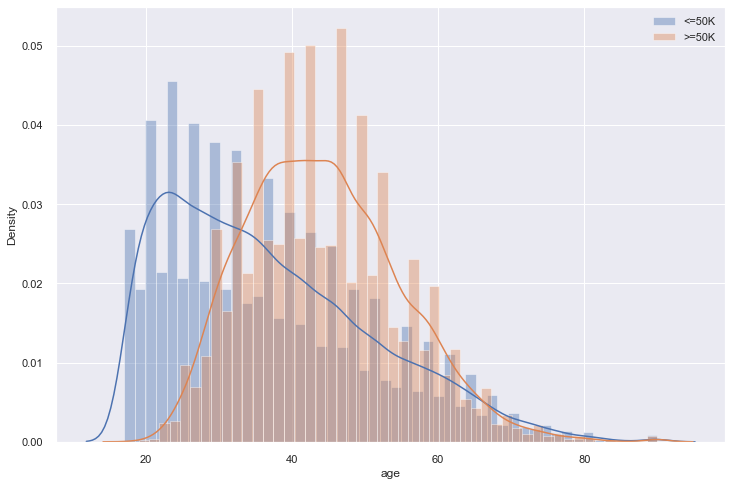

In [397]:
fig, ax = plt.subplots(figsize=(12, 8))
mask = df["income"] == "<=50K"
ax = sns.distplot(df[mask].age, label='<=50K')
ax = sns.distplot(df[~mask].age,label='>=50K')
#ax.set_xlim(-1.5, 1.5)
ax.legend()

Conclusion: People making less than 50,000 a year are younger, however, these proportions become almost identical once people reach retirement.

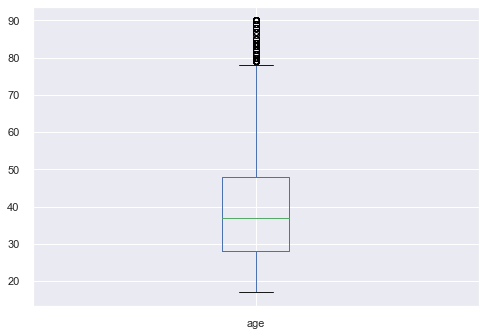

In [398]:
# Display box and whisker plots.
df['age'].plot(kind='box')
plt.show()

Conclusion: Some outliers, but that's fine here. However, looking at the previous summary, the youngest person in the dataset is 17, yet there are people whose education stops at preschool. How is that possible?

In [399]:
df['age'].min()
df.loc[df['education'] == 'Preschool']

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,capital_diff
779,64,Private,86837,Preschool,Married-civ-spouse,Handlers-cleaners,Husband,Asian-Pac-Islander,Male,0,0,40,Philippines,<=50K,0
818,21,Private,243368,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,25,Mexico,<=50K,0
1029,57,Private,274680,Preschool,Separated,Prof-speciality,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
1059,31,Private,25610,Preschool,Never-married,Handlers-cleaners,Not-in-family,Amer-Indian-Eskimo,Male,0,0,25,United-States,<=50K,0
1489,19,Private,277695,Preschool,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48079,31,State-gov,77634,Preschool,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,<=50K,0
48316,40,Private,566537,Preschool,Married-civ-spouse,Other-service,Husband,White,Male,0,1672,40,Mexico,<=50K,-1672
48505,40,Private,70645,Preschool,Never-married,Other-service,Not-in-family,White,Female,0,0,20,United-States,<=50K,0
48640,46,Private,139514,Preschool,Married-civ-spouse,Machine-op-inspct,Other-relative,Black,Male,0,0,75,Dominican-Republic,<=50K,0


People with only a pre-school education don't seem to have any obvious trends. It is definitely possible though for someone to never go to school as a kid/teenager (I looked it up), so this seems possible.

### Hours-per-week

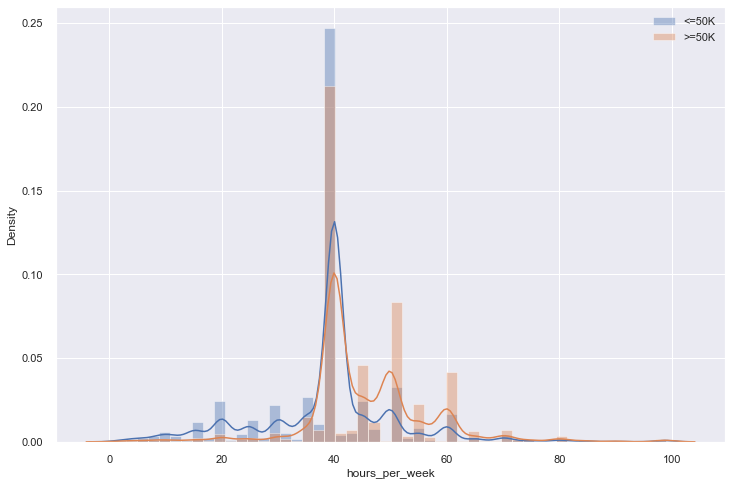

In [400]:
fig, ax = plt.subplots(figsize=(12, 8))
mask = df["income"] == "<=50K"
ax = sns.distplot(df[mask]["hours_per_week"], label='<=50K')
ax = sns.distplot(df[~mask]["hours_per_week"],label='>=50K')
#ax.set_xlim(-1.5, 1.5)
ax.legend()

Most people seem to work a standard 40 hour work week. People who work less than 40 hours per week typically make less than 50,000, while people who work more than 40 hours per week make more than 50,000.

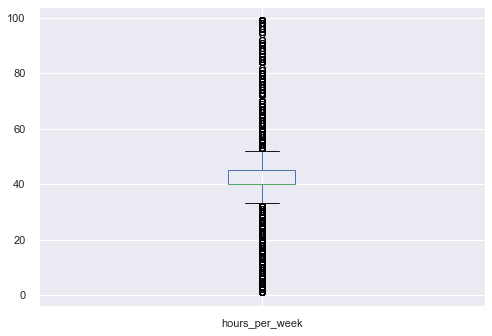

In [401]:
# Display box and whisker plots.
df['hours_per_week'].plot(kind='box')
plt.show()

Lot's of outliers for hours per week, but that is probably because the vast majority of people work a 40 hour workweek.

### Capital_diff

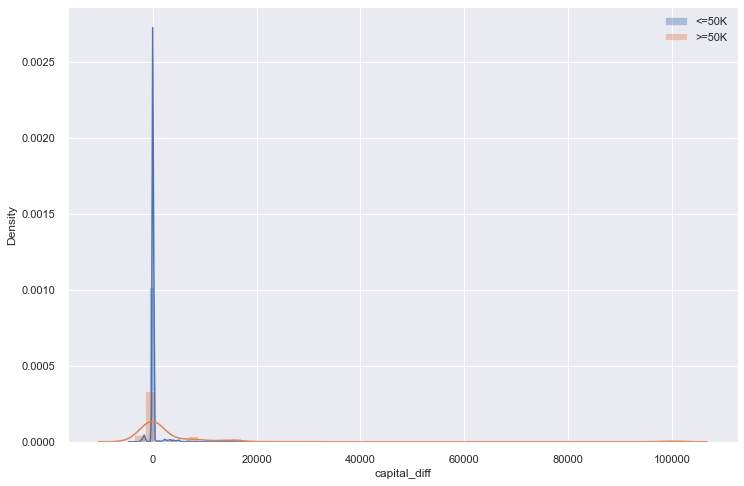

In [402]:
fig, ax = plt.subplots(figsize=(12, 8))
mask = df["income"] == "<=50K"
ax = sns.distplot(df[mask]["capital_diff"], label='<=50K')
ax = sns.distplot(df[~mask]["capital_diff"],label='>=50K')
ax.legend()

Conclusion: Hard to see, but it seems like people making more than 50,000 per year are more spread out.

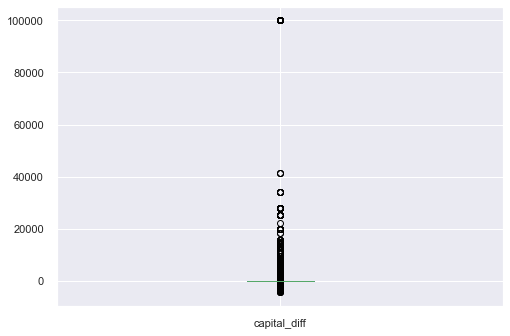

In [403]:
# Display box and whisker plots.
df['capital_diff'].plot(kind='box')
plt.show()

Seems like most people did not seem much capital gains or losses, but outliers skew more towards gains.

### Continuous variables

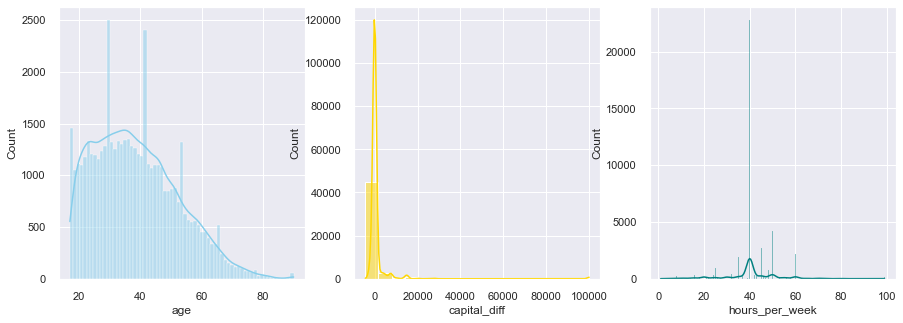

In [404]:
# libraries & dataset

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=df, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="capital_diff", kde=True, color="gold", ax=axs[1])
sns.histplot(data=df, x="hours_per_week", kde=True, color="teal", ax=axs[2])

plt.show()

In [405]:

col_names = ['age', 'capital_diff', 'hours_per_week']
features = df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,age,capital_diff,hours_per_week
0,-0.995129,-0.132642,-0.034087
1,-0.046942,-0.132642,0.772930
2,-0.776316,-0.132642,-0.034087
3,0.390683,0.895787,-0.034087
4,-1.505691,-0.132642,-0.841104


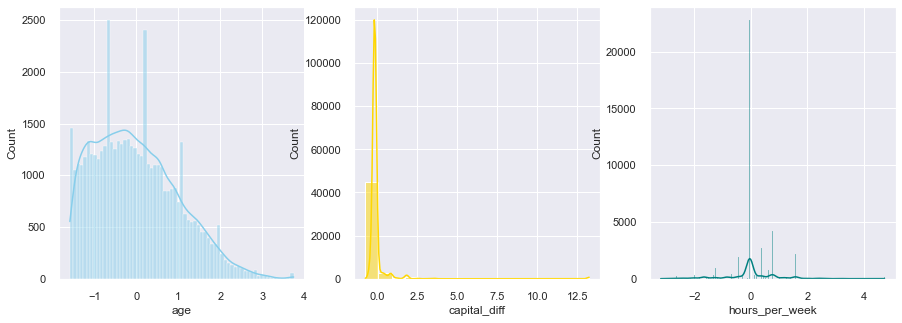

In [406]:
# libraries & dataset

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(data=scaled_features, x="age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=scaled_features, x="capital_diff", kde=True, color="gold", ax=axs[1])
sns.histplot(data=scaled_features, x="hours_per_week", kde=True, color="teal", ax=axs[2])

plt.show()

In [407]:
df = df.assign(age=scaled_features['age'])
df = df.assign(capital_diff=scaled_features['capital_diff'])
df = df.assign(hours_per_week=scaled_features['hours_per_week'])

In [408]:
df

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,capital_diff
0,-0.995129,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,-0.034087,United-States,<=50K,-0.132642
1,-0.046942,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,0.772930,United-States,<=50K,-0.132642
2,-0.776316,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,-0.034087,United-States,>50K,-0.132642
3,0.390683,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,-0.034087,United-States,>50K,0.895787
4,-1.505691,Private,103497,Some-college,Never-married,Prof-speciality,Own-child,White,Female,0,0,-0.841104,United-States,<=50K,-0.132642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,-0.849254,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,-0.195490,United-States,<=50K,-0.132642
48838,0.098933,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,-0.034087,United-States,>50K,-0.132642
48839,1.411808,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,-0.034087,United-States,<=50K,-0.132642
48840,-1.213941,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,-1.648120,United-States,<=50K,-0.132642


### fnlwgt

In [409]:
df['fnlwgt'].nunique()

28523

Conclusion: I'm not sure whether to keep this or not. Not sure how this value could aid prediction.

### Categorical variables

In [410]:
# Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

# Print all values in list.
print("Categorical variables:", "\n")
print(object_cols)

Categorical variables: 

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income']


In [411]:
# Check levels for each categorical variable.
for i in df.columns:
    if df.dtypes[i] != 'int64':
        print(i, df[i].value_counts(dropna=False), "\n")

age -0.192816    1348
-0.265754    1337
-0.411629    1335
-1.141004    1329
-0.557504    1325
             ... 
 3.599933       6
 3.381121       5
 3.526996       3
 3.672871       2
 3.454058       1
Name: age, Length: 74, dtype: int64 

workclass Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64 

education HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64 

marital_status Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separate

In [412]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
marital_status     object
occupation         object
relationship       object
race               object
gender             object
capital_gain        int64
capital_loss        int64
hours_per_week    float64
native_country     object
income             object
capital_diff      float64
dtype: object

In [413]:
df = df.drop(columns=['fnlwgt', 'capital_gain', 'capital_loss'])

In [414]:
# Dummy code. 
df = pd.concat([df, pd.get_dummies(data = df, columns = list(s[s].index), drop_first=True)], axis = 1)

In [415]:
# Add column to abalone that dummy codes Sex, and then drops the first column.
#df = pd.get_dummies(data=df, columns=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'gender', 'native_country', 'income'])

In [417]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,-0.995129,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,-0.034087,United-States,...,0,0,0,0,0,0,1,0,0,0
1,-0.046942,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.772930,United-States,...,0,0,0,0,0,0,1,0,0,0
2,-0.776316,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,-0.034087,United-States,...,0,0,0,0,0,0,1,0,0,1
3,0.390683,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,-0.034087,United-States,...,0,0,0,0,0,0,1,0,0,1
4,-1.505691,Private,Some-college,Never-married,Prof-speciality,Own-child,White,Female,-0.841104,United-States,...,0,0,0,0,0,0,1,0,0,0


In [419]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  hours_per_week
Column name :  age
Column name :  capital_diff


In [420]:
# Delete duplicate columns
df= df.drop(columns=getDuplicateColumns(df))

In [421]:
df.shape

(48842, 103)

In [423]:
list(df)

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native_country',
 'income',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital_status_Married-AF-spouse',
 'marital_status_Married-civ-spouse',
 'marital_status_Married-spouse-absent',
 'marital_status_Never-married',
 'marital_status_Separated',
 'marital_status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-clean

In [443]:
df.drop(object_cols, axis=1, inplace=True)

In [444]:
df.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_>50K
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [445]:
y = df['income_>50K']
X = df.drop(columns="income_>50K")

In [446]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [447]:
X_train

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
42392,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14623,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27411,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1288,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7078,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
44732,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
860,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [448]:
bm = DummyClassifier()
bm.fit(X_train, y_train)
bm.score(X_test, y_test)

0.6419163311267317

In [449]:

metrics.precision_score(y_test, bm.predict(X_test))

0.23908111174134997

In [450]:
y_test

7762     0
23881    0
30507    1
28911    0
19484    0
        ..
15938    0
27828    0
28449    0
5647     0
27058    0
Name: income_>50K, Length: 14653, dtype: uint8

In [451]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])
X.columns[X.columns.duplicated()]

Index([], dtype='object')

In [452]:
X = X.iloc[: , 5:]

In [453]:
X.columns[X.columns.duplicated()]

Index([], dtype='object')

In [458]:

for model in [DummyClassifier,
              LogisticRegression,
              DecisionTreeClassifier,
              KNeighborsClassifier,
              GaussianNB,
              RandomForestClassifier,
              xgboost.XGBClassifier]:
    cls = model()
    kfold = model_selection.KFold(n_splits=10)
    s = model_selection.cross_val_score(cls, X, y, scoring="roc_auc", cv=kfold)
    print(f"{model.__name__:22} AUC: " f"{s.mean():.3f} STD: {s.std():.2f}")

DummyClassifier        AUC: 0.500 STD: 0.00
LogisticRegression     AUC: 0.878 STD: 0.01
DecisionTreeClassifier AUC: 0.838 STD: 0.01
KNeighborsClassifier   AUC: 0.814 STD: 0.01
GaussianNB             AUC: 0.826 STD: 0.01
RandomForestClassifier AUC: 0.861 STD: 0.00
[20:02:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:02:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XG

In [ ]:

clfs = [x() for x in [LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,GaussianNB,RandomForestClassifier,xgboost.XGBClassifier]]

stack = StackingClassifier(classifiers=clfs,meta_classifier=LogisticRegression())
kfold = model_selection.KFold(n_splits=10)
s = model_selection.cross_val_score(stack, X, y, scoring="roc_auc", cv=kfold)
print(f"{stack.__class__.__name__} " f"AUC: {s.mean():.3f} STD: {s.std():.2f}"
)

In [210]:
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [211]:
rf.score(X_test, y_test)

0.8582542823995086

In [212]:
metrics.precision_score(y_test, rf.predict(X_test))

0.7196597971867844

In [213]:
metrics.recall_score(y_test, rf.predict(X_test))

0.6432748538011696

In [214]:
for col, val in sorted(zip(X_train.columns,rf.feature_importances_,),key=lambda x: x[1],reverse=True,)[:5]:print(f"{col:10}{val:10.3f}")

age            0.118
age            0.117
marital-status_Married-civ-spouse     0.091
capital-gain     0.062
hours-per-week     0.057


In [255]:
rf4 = ensemble.RandomForestClassifier()
params = {"max_features": [0.4, "auto"],"n_estimators": np.arange(1, 200, 50),"min_samples_leaf": [1, 0.1],"random_state": [42]}
cv = model_selection.GridSearchCV(rf4, params, n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 101, 'random_state': 42}


In [230]:
rf5 = ensemble.RandomForestClassifier(**{"max_features": "auto","min_samples_leaf": 1,"n_estimators": 200,"random_state": 42,})
rf5.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=True)

In [231]:
rf5.score(X_test, y_test)

0.858390773220501

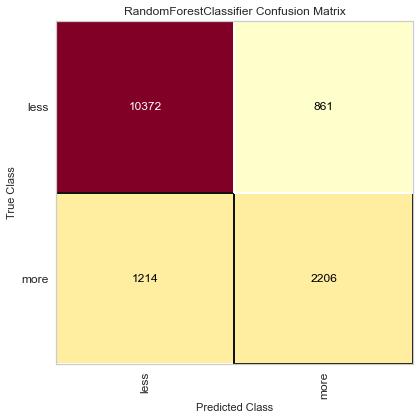

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [232]:

y_pred = rf5.predict(X_test)
confusion_matrix(y_test, y_pred)
mapping = {0: "less", 1: "more"}
fig, ax = plt.subplots(figsize=(6, 6))
cm_viz = ConfusionMatrix(rf5,classes=["less", "more"],label_encoder=mapping,)
cm_viz.score(X_test, y_test)
cm_viz.poof()

In [233]:

y_pred = rf5.predict(X_test)
roc_auc_score(y_test, y_pred)

0.784190040518668

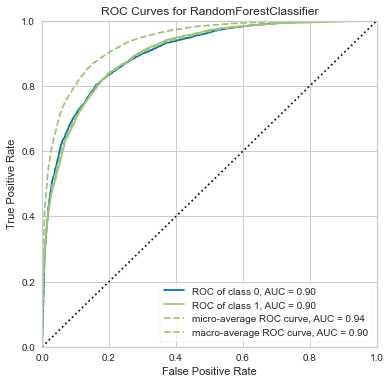

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [238]:

fig, ax = plt.subplots(figsize=(6, 6))
roc_viz = ROCAUC(rf5)
roc_viz.fit(X_train, y_train) 
roc_viz.score(X_test, y_test)
roc_viz.poof()

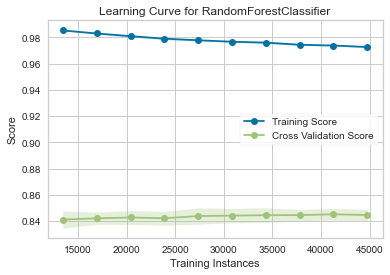

<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>

In [241]:

fig, ax = plt.subplots(figsize=(6, 4))
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)
lc_viz = LearningCurve(rf5,cv=cv,train_sizes=sizes,scoring="f1_weighted",n_jobs=4,ax=ax)
lc_viz.fit(X, y)
lc_viz.poof()

In [247]:
np.arange(1, 200, 1)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [243]:
C

[1, 10]